In [41]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from pathlib import Path

notebook_path = os.path.join(os.getcwd())
data_path = Path(notebook_path).parent.joinpath('data')

# Read data
df = pd.read_csv(data_path / 'wildfires_with_geocoord.csv', parse_dates=True)

# some data wrangling
df['month'] = pd.to_datetime(df.alarm_date).dt.month
# .strftime('%b')
df.dropna(subset='month', inplace=True)
grouped = df.groupby(['month', 'year']).count()
grouped.reset_index(inplace=True)
grouped = grouped[['month', 'year', 'agency']]
grouped.columns = ['month', 'year', 'count']
grouped.sort_values('year', inplace=True)
df_12_months = pd.DataFrame(columns=['month'], data={'month':np.arange(1,13)})
df_years = pd.DataFrame(columns=['year'], data={'year':np.arange(1898,2019)})
temp = df_years.merge(df_12_months, how='cross')
df_merged = temp.merge(grouped, how='outer', left_on=['year','month'], right_on=['year','month']).sort_values(['year', 'month'])
df_merged.fillna(0, inplace=True)
df_merged.to_csv(data_path / 'wildfires_grouped_task4_3.csv', index=False)

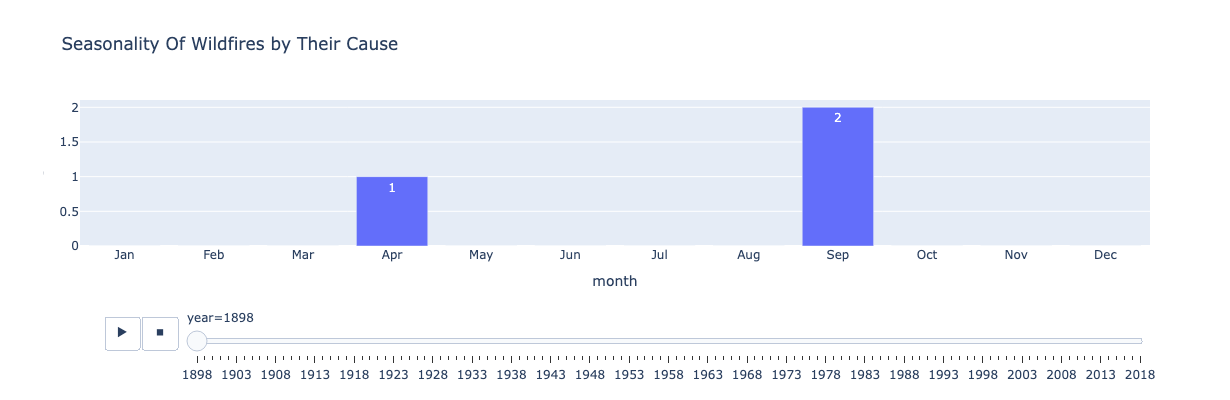

In [44]:
df_4_3 = pd.read_csv(data_path / 'wildfires_grouped_task4_3.csv')
fig_4_3 = px.bar(df_4_3, x="month", y="count", title="Seasonality Of Wildfires by Their Cause",
            height=400,
            width=1000,
            text_auto=True,
            animation_frame='year'
            )
fig_4_3.update_xaxes(tickvals=np.arange(1,13), ticktext=['Jan', 'Feb', 'Mar',
                                                   'Apr', 'May', 'Jun',
                                                   'Jul', 'Aug', 'Sep',
                                                   'Oct', 'Nov', 'Dec'])
fig_4_3.update_yaxes(title_font={'size':1})
xaxis = go.layout.YAxis(
        tickangle = 45)
fig_4_3.update_yaxes(matches=None)

fig_4_3.show()